# Tensor Network for 2D Classical Ising Model-0
## 2 X 2 Lattice

In [1]:
# import libraries
import Tor10
import copy
import numpy as np
import matplotlib.pyplot as plt

def Tprint(T):
    print(T.Print_diagram())
    print(T)
    
def Tprint_diag(T):
    diag = np.array([T[i,i].item() for i in range(T.bonds[0].dim)])
    print(diag)

def SetZeros(T):
    T.SetElem(np.zeros(T.shape).reshape(-1))
    return

In [2]:
# contraction of 2 by 2 lattice
def contract(beta):
    # bond
    bd = Tor10.Bond(2)
    
    # W
    W = Tor10.UniTensor([bd,bd],rowrank=1)
    W.SetName('W')
    W.SetElem([np.sqrt(np.cosh(beta)), np.sqrt(np.sinh(beta)),
               np.sqrt(np.cosh(beta)), -np.sqrt(np.sinh(beta))])
#     Tprint(W)

    # T and Tz
    T = Tor10.UniTensor([bd,bd,bd,bd],rowrank=2, name='T')
    Tz = Tor10.UniTensor([bd,bd,bd,bd],rowrank=2, name='Tz')
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    T[i,j,k,l] = W[0,i].item()*W[0,j].item()*W[0,k].item()*W[0,l].item()                    + W[1,i].item()*W[1,j].item()*W[1,k].item()*W[1,l].item()     
                    Tz[i,j,k,l] = W[0,i].item()*W[0,j].item()*W[0,k].item()*W[0,l].item()- W[1,i].item()*W[1,j].item()*W[1,k].item()*W[1,l].item()     
#     Tprint(T.GetBlock())
#     Tprint(Tz.GetBlock())

    # Trace
#     T11 : 0 1; 3 4
#     T12 : 2 3; 1 6
#     T21 : 4 5; 7 0
#     T22 : 6 7; 5 2
        
    # Z
    T11 = copy.deepcopy(T)
    T12 = copy.deepcopy(T)
    T21 = copy.deepcopy(T)
    T22 = copy.deepcopy(T)

    T11.SetLabels([0,1,3,4])
    T12.SetLabels([2,3,1,6])
    T21.SetLabels([4,5,7,0])
    T22.SetLabels([6,7,5,2])

    Z = Tor10.Contract(Tor10.Contract(T11, T12), Tor10.Contract(T21, T22))
    Z = Z.item()
#     print(Z)

    # SzSz
    T11 = copy.deepcopy(Tz)
    T12 = copy.deepcopy(Tz)
    T21 = copy.deepcopy(T)
    T22 = copy.deepcopy(T)

    T11.SetLabels([0,1,3,4])
    T12.SetLabels([2,3,1,6])
    T21.SetLabels([4,5,7,0])
    T22.SetLabels([6,7,5,2])

    SzSz = Tor10.Contract(Tor10.Contract(T11, T12), Tor10.Contract(T21, T22))
    SzSz = SzSz.item()
#     print(SzSz)

    # Cmax
    T11 = copy.deepcopy(Tz)
    T12 = copy.deepcopy(T)
    T21 = copy.deepcopy(T)
    T22 = copy.deepcopy(Tz)

    T11.SetLabels([0,1,3,4])
    T12.SetLabels([2,3,1,6])
    T21.SetLabels([4,5,7,0])
    T22.SetLabels([6,7,5,2])

    Cmax = Tor10.Contract(Tor10.Contract(T11, T12), Tor10.Contract(T21, T22))
    Cmax = Cmax.item()
#     print(Cmax)
    
    # m
    T11 = copy.deepcopy(Tz)
    T12 = copy.deepcopy(T)
    T21 = copy.deepcopy(T)
    T22 = copy.deepcopy(T)

    T11.SetLabels([0,1,3,4])
    T12.SetLabels([2,3,1,6])
    T21.SetLabels([4,5,7,0])
    T22.SetLabels([6,7,5,2])

    m = Tor10.Contract(Tor10.Contract(T11, T12), Tor10.Contract(T21, T22))
    m = m.item()
#     print(m)    

    return Z, SzSz, Cmax, m

Z, SzSz, Cmax, m = contract(1)
print(Z)
print(SzSz/Z)
print(Cmax/Z)
print(m/Z)

5973.916645008712
0.9979910429683446
0.9973216901154172
0.0


In [3]:
#  exact solution for 2 by 2 lattice
def exact(beta):
    Z = 2*np.exp(8*beta)+12+2*np.exp(-8*beta)
    F = -np.log(Z)/beta
    E = -(2*8*np.exp(8*beta)+2*(-8)*np.exp(-8*beta))/Z
    E_sqr = (2*64*np.exp(8*beta) +2*64*np.exp(-8*beta))/Z
    C = (E_sqr-E*E)*(beta*beta)
    M_abs = (2*4*np.exp(8*beta)+8*2)/Z
    M_sqr = (2*16*np.exp(8*beta)+8*4)/Z
    chi_p = (M_sqr-M_abs*M_abs)*beta
    
    return Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p

## Energy per bond

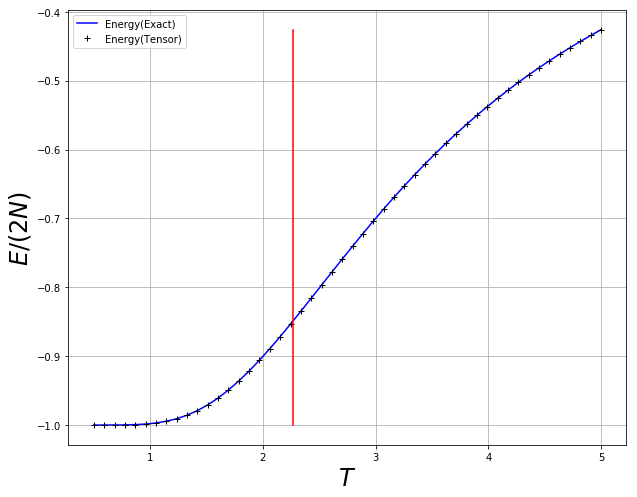

In [4]:
N = 4
plt.figure(figsize=(10,8))
T = np.linspace(0.5, 5, 50)
beta = 1.0/T
Tc = 2/np.log(1+np.sqrt(2))

Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p = exact(beta)
plt.plot(T, E/(2*N), 'b-', label='Energy(Exact)')

Z = np.zeros_like(beta)
SzSz = np.zeros_like(beta)
Cmax = np.zeros_like(beta)
m = np.zeros_like(beta)

for i in range(beta.size):
    Z[i], SzSz[i], Cmax[i], m[i] = contract(beta[i])
plt.plot(T, -SzSz/Z, 'k+', label='Energy(Tensor)')
plt.plot([Tc, Tc], [np.min(-SzSz/Z),np.max(-SzSz/Z)], 'r')
plt.legend()
plt.grid()
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$E/(2N)$', fontsize=24)
plt.show()

## Specific heat per site

Text(0, 0.5, '$C/N$')

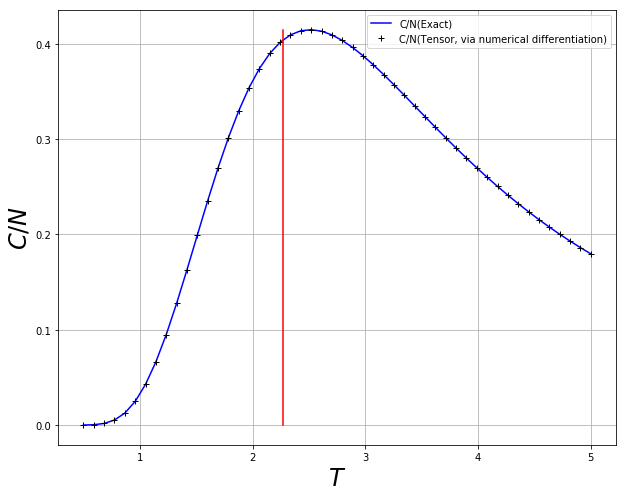

In [5]:
N = 4
plt.figure(figsize=(10,8))
T = np.linspace(0.5, 5, 50)
beta = 1.0/T
Tc = 2/np.log(1+np.sqrt(2))

Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p = exact(beta)
plt.plot(T, C/N, 'b-', label='C/N(Exact)')

Z = np.zeros_like(beta)
SzSz = np.zeros_like(beta)
Cmax = np.zeros_like(beta)
m = np.zeros_like(beta)

for i in range(beta.size):
    Z[i], SzSz[i], Cmax[i], m[i] = contract(beta[i])

plt.plot(T, C/N, 'k+', label='C/N(Tensor, via numerical differentiation)')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
plt.legend()
plt.grid()
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)

## Use Cmax to approximate $m^2$

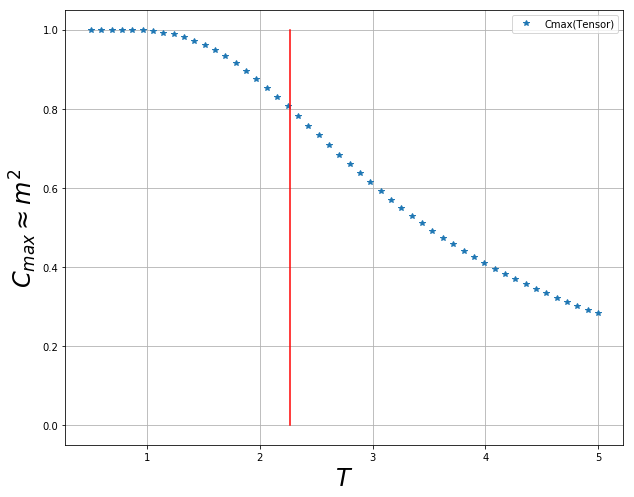

In [6]:
N = 4
plt.figure(figsize=(10,8))
T = np.linspace(0.5, 5, 50)
beta = 1.0/T
Tc = 2/np.log(1+np.sqrt(2))

Z = np.zeros_like(beta)
SzSz = np.zeros_like(beta)
m = np.zeros_like(beta)
Cmax = np.zeros_like(beta)

for i in range(beta.size):
    Z[i], SzSz[i], Cmax[i], m[i] = contract(beta[i])
plt.plot(T, Cmax/Z, '*', label='Cmax(Tensor)')
plt.plot([Tc, Tc], [0,1], 'r')
plt.legend()
plt.grid()
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C_{max}\approx m^2$', fontsize=24)
plt.show()

## $\frac{dC_{max}}{dT}$

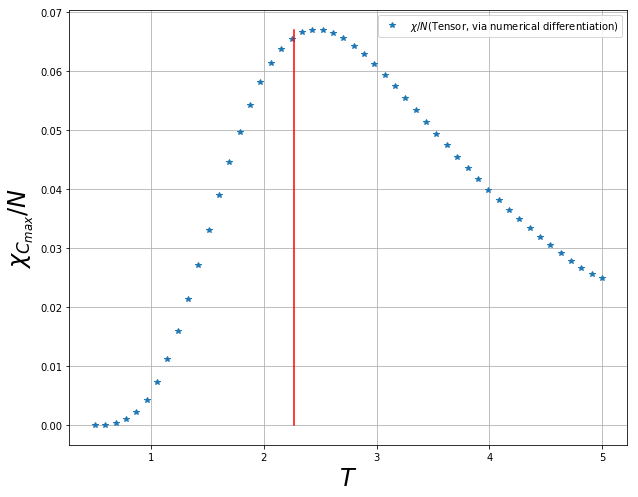

In [7]:
N = 4
plt.figure(figsize=(10,8))
T = np.linspace(0.5, 5, 50)
beta = 1.0/T
Tc = 2/np.log(1+np.sqrt(2))

Z = np.zeros_like(beta)
SzSz = np.zeros_like(beta)
Cmax = np.zeros_like(beta)
m = np.zeros_like(beta)

for i in range(beta.size):
    Z[i], SzSz[i], Cmax[i], m[i] = contract(beta[i])

chi = -np.gradient(Cmax/Z, T)
plt.plot(T, chi/N, '*', label=r'$\chi/N$(Tensor, via numerical differentiation)')
plt.plot([Tc, Tc], [np.min(chi/N),np.max(chi/N)], 'r')
plt.legend()
plt.grid()
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi_{C_{max}}/N$', fontsize=24)
plt.show()